# Inisiasi Library yg akan digunakan


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('Laptop_price.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [7]:
df.isnull().sum()

Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64

# Visualisasi Data

<Axes: >

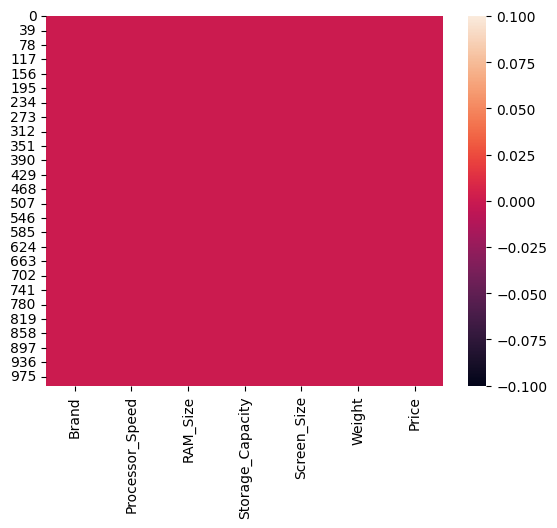

In [8]:
sns.heatmap(df.isnull())

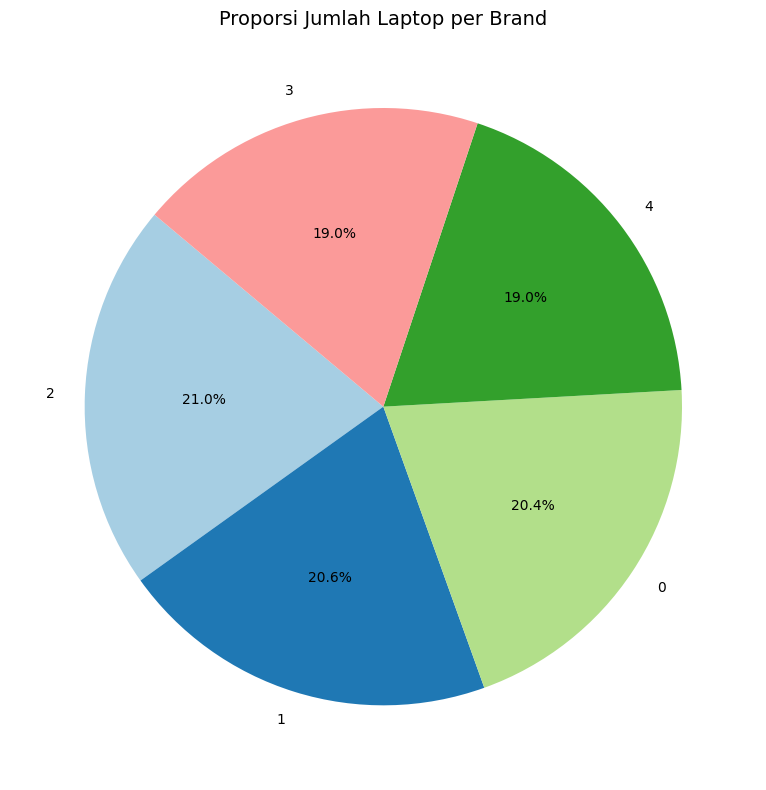

In [22]:
# Menghitung proporsi jumlah laptop per brand
brand_counts = df["Brand"].value_counts()

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(brand_counts, labels=brand_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Menambahkan judul
plt.title("Proporsi Jumlah Laptop per Brand", fontsize=14)

# Menampilkan plot
plt.tight_layout()
plt.show()


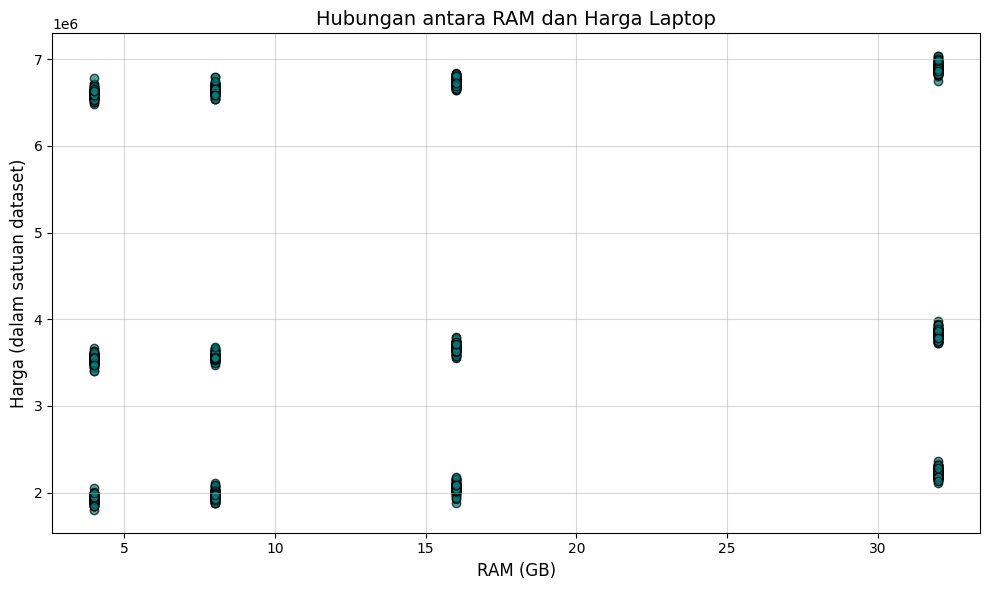

In [9]:
# Membuat scatter plot untuk harga vs ukuran RAM
plt.figure(figsize=(10, 6))
plt.scatter(df["RAM_Size"], df["Price"], alpha=0.7, color='teal', edgecolor='black')

# Menambahkan judul dan label
plt.title("Hubungan antara RAM dan Harga Laptop", fontsize=14)
plt.xlabel("RAM (GB)", fontsize=12)
plt.ylabel("Harga (dalam satuan dataset)", fontsize=12)
plt.grid(alpha=0.5)

# Menampilkan plot
plt.tight_layout()
plt.show()


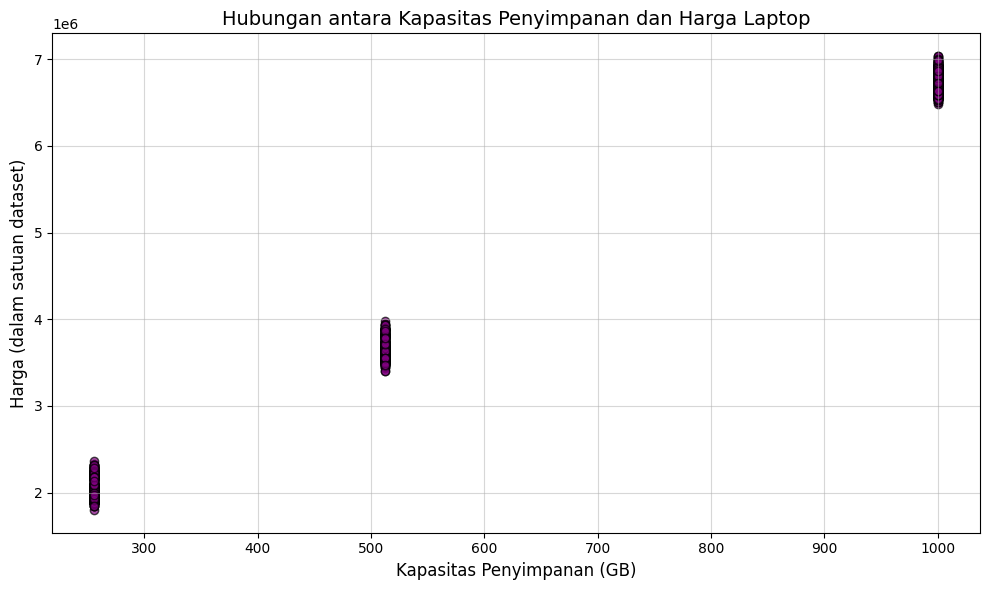

In [18]:
# Membuat scatter plot untuk harga vs kapasitas penyimpanan
plt.figure(figsize=(10, 6))
plt.scatter(df["Storage_Capacity"], df["Price"], alpha=0.7, color='purple', edgecolor='black')

# Menambahkan judul dan label
plt.title("Hubungan antara Kapasitas Penyimpanan dan Harga Laptop", fontsize=14)
plt.xlabel("Kapasitas Penyimpanan (GB)", fontsize=12)
plt.ylabel("Harga (dalam satuan dataset)", fontsize=12)
plt.grid(alpha=0.5)

# Menampilkan plot
plt.tight_layout()
plt.show()


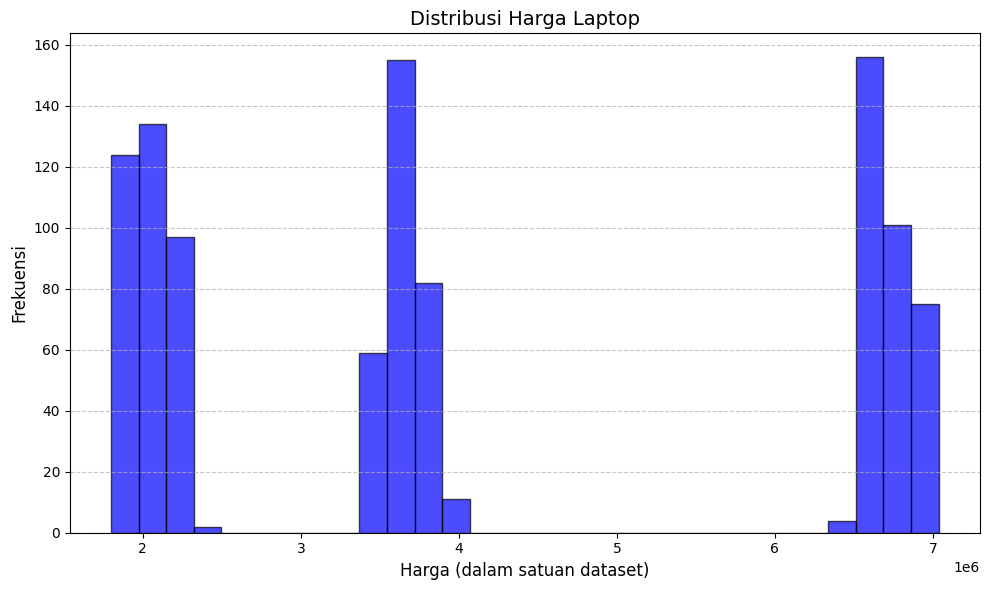

In [20]:
# Membuat histogram untuk distribusi harga laptop
plt.figure(figsize=(10, 6))
plt.hist(df["Price"], bins=30, color='blue', edgecolor='black', alpha=0.7)

# Menambahkan judul dan label
plt.title("Distribusi Harga Laptop", fontsize=14)
plt.xlabel("Harga (dalam satuan dataset)", fontsize=12)
plt.ylabel("Frekuensi", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.tight_layout()
plt.show()


# Pembuatan Model

In [10]:
label_cols = ['Brand']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])
    print(df[col])

0      1
1      0
2      4
3      0
4      0
      ..
995    3
996    2
997    2
998    1
999    4
Name: Brand, Length: 1000, dtype: int64


In [11]:
X = df.drop(['Weight', 'Price'], axis=1) #Fitur
y = df['Price'] #Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X)

     Brand  Processor_Speed  RAM_Size  Storage_Capacity  Screen_Size
0        1         3.830296        16               512    11.185147
1        0         2.912833         4              1000    11.311372
2        4         3.241627         4               256    11.853023
3        0         3.806248        16               512    12.280360
4        0         3.268097        32              1000    14.990877
..     ...              ...       ...               ...          ...
995      3         3.343584         4              1000    12.587095
996      2         2.780555         8               256    12.679356
997      2         3.200569         4               512    12.666315
998      1         1.604182         8               256    11.215581
999      4         1.711980         4               256    16.561498

[1000 rows x 5 columns]


In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
#from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
#from catboost import CatBoostRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'Bagging': BaggingRegressor(random_state=42),
    'Extra Trees': ExtraTreesRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Linear Regression': LinearRegression(),
    'Support Vector Regression': SVR(),
    #'XGBoost': XGBRegressor(random_state=42),
    'LightGBM': LGBMRegressor(random_state=42, verbose=-1),
    #'CatBoost': CatBoostRegressor(random_state=42, verbose=False)
}


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}:')
    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')
    print(f'R² Score: {r2}')
    print("--------------------------------------")

Random Forest:
Mean Absolute Error: 36107.2537370177
Mean Squared Error: 1897884542.967088
R² Score: 0.9995260180015307
--------------------------------------
Gradient Boosting:
Mean Absolute Error: 34533.58585497167
Mean Squared Error: 1721814390.458193
R² Score: 0.999569990161516
--------------------------------------
AdaBoost:
Mean Absolute Error: 45999.46106665837
Mean Squared Error: 3420298026.7594023
R² Score: 0.9991458069985915
--------------------------------------
Bagging:
Mean Absolute Error: 38805.62022977419
Mean Squared Error: 2168827637.2776527
R² Score: 0.9994583520574728
--------------------------------------
Extra Trees:
Mean Absolute Error: 36212.114338130596
Mean Squared Error: 1973538483.5426939
R² Score: 0.9995071240144972
--------------------------------------
Decision Tree:
Mean Absolute Error: 49005.979512607846
Mean Squared Error: 3739830533.8674593
R² Score: 0.9990660062241681
--------------------------------------
Linear Regression:
Mean Absolute Error: 30489

f:\Python\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
f:\Python\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   int64  
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 54.8 KB


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
print("Estimasi Harga")
print(lr.predict(np.array([[1,3.2,32,500, 15.6]])))

Estimasi Harga
[3785374.61477703]


f:\Python\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [16]:
import pickle

filename = 'estimasi_latop.sav'

pickle.dump(lr, open(filename, 'wb'))

In [17]:
import pickle

# Ekspor model ke file .pkl
with open('estimasi_harga_laptop_model.pkl', 'wb') as file:
    pickle.dump(lr, file)  
